# Sentiment Analysis with twitter data  
This project entails analyzing the sentiment associated with tweets on the current pandemic of covid-19.  
The data is obtained from twitter using a script I designed,you may have a look at it [here.](https://github.com/lyraxvincent/twitter-tweepy/blob/master/tweetscrap.py) (with a few modifications of the script of course)  
I modified the script to fit the needs:
- Tweets obtained are only from the country Kenya
- Tweets obtained are only in the English language
- No retweets obtained

I used the powerful text processing python module **TextBlob** for this task.

**Import necessary modules**

In [1]:
import pandas as pd
from textblob import TextBlob

Load the data

In [2]:
tweets = pd.read_csv('covidKE tweets.csv')

Viewing the data

In [3]:
tweets.head()

,tweet_id,text,created_at,likes
0,1242123434466979841,Everyday might not be good but there's always ...,2020-03-23 16:17:58,1
1,1242123396684697603,The next one week 😷\n\n #coronaviruskenya,2020-03-23 16:17:49,0
2,1242123373188124673,#coronaviruskenya #LockdownNow #UhuruKenyatta ...,2020-03-23 16:17:44,0
3,1242086219519012867,Internet never forget we will remind you that ...,2020-03-23 13:50:06,0
4,1242123367882330113,@ntsa_kenya @DCI_Kenya #coronaviruskenya If on...,2020-03-23 16:17:43,0


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    1190 non-null   int64 
 1   text        1190 non-null   object
 2   created_at  1190 non-null   object
 3   likes       1190 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 37.3+ KB


## Text Preprocessing

We remove any special characters, punctuations and stopwords from the tweets.

In [12]:
import re
import string
from nltk.corpus import stopwords

Let's design a function for this task

In [17]:
regex = re.compile('[^a-zA-Z]')
def text_process(text):
    np = text.lower().split('#coronaviruskenya') # Remove the hashtag
    np = ''.join(np)
    np = [c for c in np if c not in string.punctuation]
    np = [c for c in np if c != '\n'] # Removing newline
    np = ''.join(np)
    np = np.split('https')[0] # Remove links
    np = regex.sub(' ', np) # Remove emojis and any non-letters
    np = [word for word in np.split() if word not in stopwords.words('english')] # Remove stopwords
    return ' '.join(np)

In [18]:
# Apply function to the text column
# We will overwrite the text column (after testing the function on a single tweet)

tweets['text'] = tweets['text'].apply(text_process)

In [19]:
tweets.head()

,tweet_id,text,created_at,likes
0,1242123434466979841,everyday might good theres always something go...,2020-03-23 16:17:58,1
1,1242123396684697603,next one week,2020-03-23 16:17:49,0
2,1242123373188124673,lockdownnow uhurukenyatta imagine people copin...,2020-03-23 16:17:44,0
3,1242086219519012867,internet never forget remind resorted internet...,2020-03-23 13:50:06,0
4,1242123367882330113,ntsakenya dcikenya theyll provide food outdoor...,2020-03-23 16:17:43,0


## Sentiment Analysis

An example to show how we get the sentiment score/polarity for a single tweet

In [20]:
TextBlob(tweets.text[0]).sentiment

Sentiment(polarity=0.39999999999999997, subjectivity=0.6000000000000001)

In [21]:
TextBlob(tweets['text'][0]).sentiment.polarity

0.39999999999999997

Let's add a numerical column relating to text; text length 

In [22]:
tweets['text length'] = tweets['text'].apply(len)

In [23]:
tweets.head()

,tweet_id,text,created_at,likes,text length
0,1242123434466979841,everyday might good theres always something go...,2020-03-23 16:17:58,1,58
1,1242123396684697603,next one week,2020-03-23 16:17:49,0,13
2,1242123373188124673,lockdownnow uhurukenyatta imagine people copin...,2020-03-23 16:17:44,0,71
3,1242086219519012867,internet never forget remind resorted internet...,2020-03-23 13:50:06,0,59
4,1242123367882330113,ntsakenya dcikenya theyll provide food outdoor...,2020-03-23 16:17:43,0,67


Now we design a function to apply to the text column to produce polarity for each tweet

In [24]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

We add a new column to the dataframe based off of tweet polarity

In [25]:
tweets['polarity'] = tweets['text'].apply(get_polarity)

In [26]:
# Short form using lambda
##
#tweets['polarity'] = tweets['text'].apply(lambda text: TextBlob(text).sentiment.polarity)

In [27]:
tweets.sample(30)

,tweet_id,text,created_at,likes,text length,polarity
165,1242110521903591424,dear kenyan stand italy washed hands kept good...,2020-03-23 15:26:40,1,74,0.700000
763,1242091822429679617,thought issue loans sorted relationship curren...,2020-03-23 14:12:22,0,69,0.000000
202,1242084672101920768,ok let get straightuhurukenyatta called press ...,2020-03-23 13:43:57,1,88,0.500000
842,1242088826421600259,saa zingine ata cant believe ourus audacity as...,2020-03-23 14:00:27,2,84,0.000000
491,1242071858083758080,govt put adequate measure prevent corona enter...,2020-03-23 12:53:02,0,76,0.333333
130,1242118313179840513,god heal world,2020-03-23 15:57:37,1,14,0.000000
679,1242095051804737536,kagwe appeal kenyans take matter seriously,2020-03-23 14:25:12,0,42,-0.333333
1186,1242064012797530112,oleitumbi time put mandatory hate happening it...,2020-03-23 12:21:51,1,82,-0.800000
337,1242107775435628546,huyu priest manze ametumess sana thing hits ea...,2020-03-23 15:15:45,0,58,0.000000
516,1242100273423810560,forced quarantine thing isnt working let peopl...,2020-03-23 14:45:56,1,75,0.212121


Tweets with lowest polarity(-1)

In [28]:
tweets[tweets['polarity'] == -1]

,tweet_id,text,created_at,likes,text length,polarity
357,1242106974927573000,safaricomplc apana tunataka zile za mbs dont t...,2020-03-23 15:12:34,2,90,-1.0
645,1242096205234085894,worst thing mulikacorona father mother brother...,2020-03-23 14:29:47,1,68,-1.0
1009,1242077721976545280,kplccustomercare worst time cut lights covid m...,2020-03-23 13:16:20,0,70,-1.0


Tweets with polarity 0

In [29]:
tweets[tweets['polarity'] == 0]

,tweet_id,text,created_at,likes,text length,polarity
1,1242123396684697603,next one week,2020-03-23 16:17:49,0,13,0.0
2,1242123373188124673,lockdownnow uhurukenyatta imagine people copin...,2020-03-23 16:17:44,0,71,0.0
3,1242086219519012867,internet never forget remind resorted internet...,2020-03-23 13:50:06,0,59,0.0
4,1242123367882330113,ntsakenya dcikenya theyll provide food outdoor...,2020-03-23 16:17:43,0,67,0.0
5,1242123307903844353,like hassanalijoho said total shutdown,2020-03-23 16:17:28,0,38,0.0
...,...,...,...,...,...,...
1181,1242064302816874502,itsjakusa georgew inequality kenya different i...,2020-03-23 12:23:00,0,68,0.0
1182,1242064212895174662,death zimbabwe corona virus cases,2020-03-23 12:22:39,4,33,0.0
1183,1242064211800477697,three kakamega county officials came back trip...,2020-03-23 12:22:39,2,83,0.0
1184,1242064200840744960,lets graceful enough observe protocol stay mat...,2020-03-23 12:22:36,2,70,0.0


Tweets with highest polarity(1)

In [30]:
tweets[tweets['polarity'] == 1]

,tweet_id,text,created_at,likes,text length,polarity
237,1242112888082481153,lets best version selves crisis tupendane,2020-03-23 15:36:04,0,41,1.0
1055,1242074830842793985,probably best thing youll read today click link,2020-03-23 13:04:50,1,47,1.0
1066,1242073657297551370,create best shoe impression minuel minuelfalet...,2020-03-23 13:00:11,0,87,1.0


In [31]:
# It is evident that almost half of the obtained tweets have polarity 0

Tweets with negative polarity

In [32]:
tweets[tweets['polarity'] < 0]

,tweet_id,text,created_at,likes,text length,polarity
10,1242099789694750720,need help mean ukipata corona nkama uko na aid...,2020-03-23 14:44:01,1,52,-0.3125
11,1242099788893564929,money pandemic difficult chose dying hunger,2020-03-23 14:44:01,0,43,-0.5000
26,1242085595842838529,unga revolution weve waiting may unravel hang ...,2020-03-23 13:47:37,0,63,-0.3000
27,1242122438814715904,time want see kenyans billionaires coming help...,2020-03-23 16:14:01,0,76,-0.4000
40,1242122030373318657,wanted knowwhat logic behind gap bathroom door...,2020-03-23 16:12:24,0,74,-0.4000
...,...,...,...,...,...,...
1172,1242064801540591621,citizentvkenya sad god bless us god heals us,2020-03-23 12:24:59,3,44,-0.5000
1174,1242064688533438464,startimeskenya poor services ways pandemic wat...,2020-03-23 12:24:32,2,58,-0.4000
1186,1242064012797530112,oleitumbi time put mandatory hate happening it...,2020-03-23 12:21:51,1,82,-0.8000
1188,1242063856727396352,mwendwafelix cisnyakundi robertalai levels inc...,2020-03-23 12:21:14,2,87,-0.3500


Tweets with positive polarity

In [33]:
tweets[tweets['polarity'] > 0]

,tweet_id,text,created_at,likes,text length,polarity
0,1242123434466979841,everyday might good theres always something go...,2020-03-23 16:17:58,1,58,0.400000
8,1242069774231887880,wish would much anticipated presidential addre...,2020-03-23 12:44:45,2,70,0.100000
13,1242116336739913728,taken since last friday buy gas seems differen...,2020-03-23 15:49:46,1,80,0.037500
16,1242122964608434181,togetherlets safe stop spread covid coronavirus,2020-03-23 16:16:06,1,47,0.500000
20,1242099340342067203,confirmed coronavirus cases kenya stands one c...,2020-03-23 14:42:14,5,83,0.400000
...,...,...,...,...,...,...
1168,1242064900278620160,go againhow many retweets usitoe io ngoma plea...,2020-03-23 12:25:23,2,78,0.500000
1170,1242064847866662913,nahashon way uk taking risks win google balloo...,2020-03-23 12:25:10,1,55,0.800000
1173,1242064784163573760,dating sugar momma online worth,2020-03-23 12:24:55,2,31,0.300000
1176,1242064663577272321,advice young cubs looking sugar mummy online,2020-03-23 12:24:26,1,44,0.100000


## Some EDA

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

**Distribution of polarity**

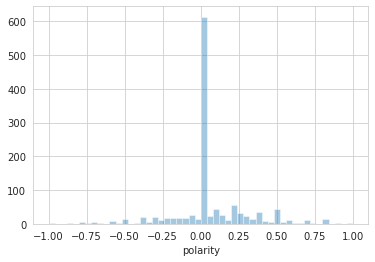

In [35]:
sns.distplot(tweets['polarity'], bins=50, kde=False)

**Distribution of text length**

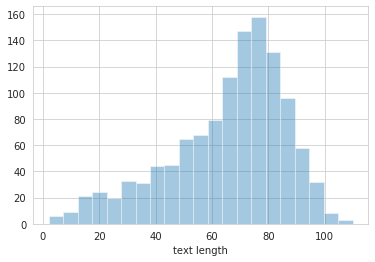

In [36]:
sns.distplot(tweets['text length'], kde=False)

A jointplot to show relation of text length and polarity

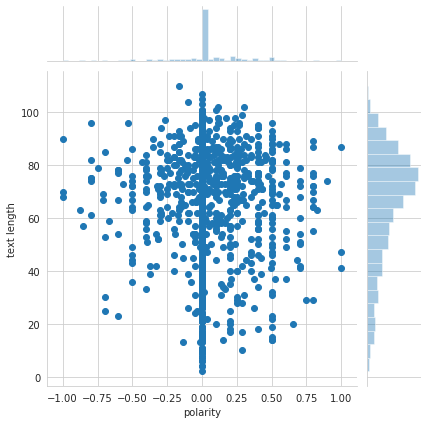

In [37]:
sns.jointplot(x='polarity', y='text length', data=tweets)

Most lengthy(range from 60 to 100) tweets range polarity from -0.25 and 0.25 from the jointplot above  
This is roughly around polarity 0, so we wouldn't be wrong to say that most lengthy tweets(in this range) have polarity of 0, or more appealing, around polarity 0  
Let's get the mean length of tweets with polarity 0 to see that indeed this length lies in this range(60 to 100)

In [38]:
tweets[tweets['polarity']==0]['text length'].mean()

62.63667232597623

To further visualize this fact, let's create the same plot but of hexagonal and regressional nature

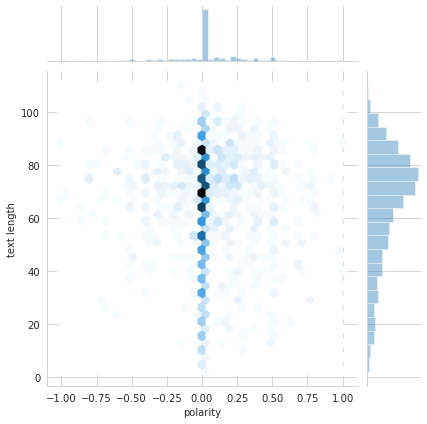

In [39]:
sns.jointplot(x='polarity', y='text length', data=tweets, kind='hex')

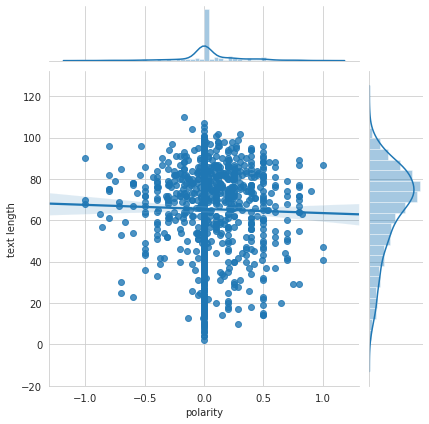

In [40]:
sns.jointplot(x='polarity', y='text length', data=tweets, kind='reg')

From this jointplot we can clearly see that the kde on the upper side of the plot shows some normal distribution around polarity 0  
This justifies our above argument that most lengthy(our range of 'lengthy') tweets have polarity of 0 (or around 0)

## Project conclusion

Clearly, we have seen that like half of the tweets have polarity of around 0.  
Does this mean that when a population is under such fear and anxiety of an epidemic, their messages express no negativity or positivity but are more neutral?